In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
import re

pd.set_option('display.max_rows', 500)

In [107]:
df = pd.read_csv('profiles.csv')
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying 

In [108]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [109]:
df.dtypes

# The data types look correct, but we want to ensure that all the values in the feature are in the correct data type

for count, i in enumerate(df.columns):
    if df[i].dtypes == 'O':
        df[i] = df[i].astype(str)
    else:
        df[i] = df[i].astype(df.dtypes[count])

## Categorical Feature Processing

In [110]:
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

def countplot(df, x):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, y=x, order=df[x].value_counts().index)
    
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, y=x, hue=df.sex, order=df[x].value_counts().index)
    plt.tight_layout()
    plt.show()
    plt.clf()

In [111]:
cat_df = df.iloc[:, [1,2,3,4,5,16,19,21,22,23,24,25,26,27,28,29]]
cat_df

,body_type,diet,drinks,drugs,education,ethnicity,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks
0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",transportation,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english
1,average,mostly other,often,sometimes,working on space camp,white,hospitality / travel,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (..."
2,thin,anything,socially,nan,graduated from masters program,nan,nan,"san francisco, california",nan,straight,has cats,nan,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,thin,vegetarian,socially,nan,working on college/university,white,student,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,nan,m,pisces,no,"english, german (poorly)"
4,athletic,nan,socially,never,graduated from college/university,"asian, black, other",artistic / musical / writer,"san francisco, california",nan,straight,likes dogs and likes cats,nan,m,aquarius,no,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,nan,nan,socially,never,graduated from college/university,nan,sales / marketing / biz dev,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english
59942,fit,mostly anything,often,sometimes,working on college/university,"white, other",entertainment / media,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently)
59943,average,mostly anything,not at all,never,graduated from masters program,asian,construction / craftsmanship,"south san francisco, california",doesn&rsquo;t have kids,straight,nan,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently)
59944,athletic,mostly anything,socially,often,working on college/university,"asian, black",medicine / health,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ..."


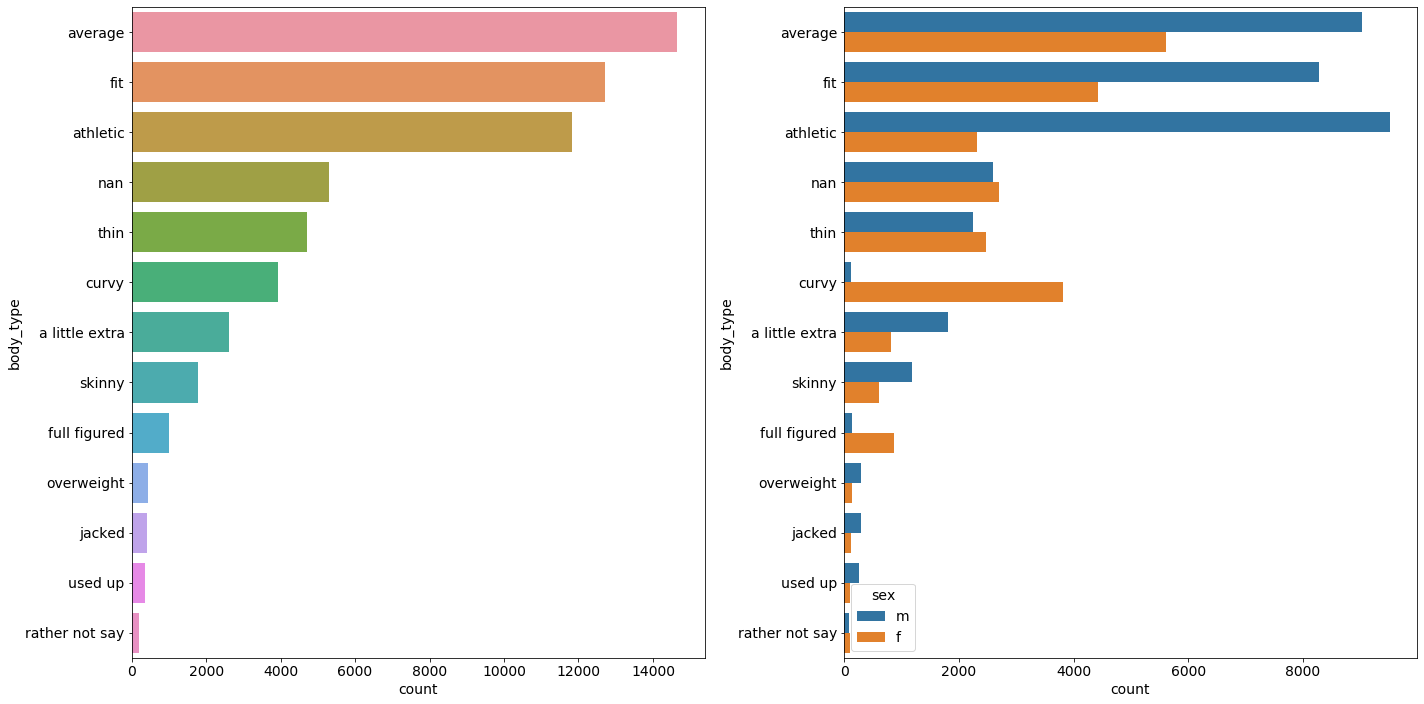

<Figure size 432x288 with 0 Axes>

In [112]:
countplot(cat_df, cat_df.columns[0])

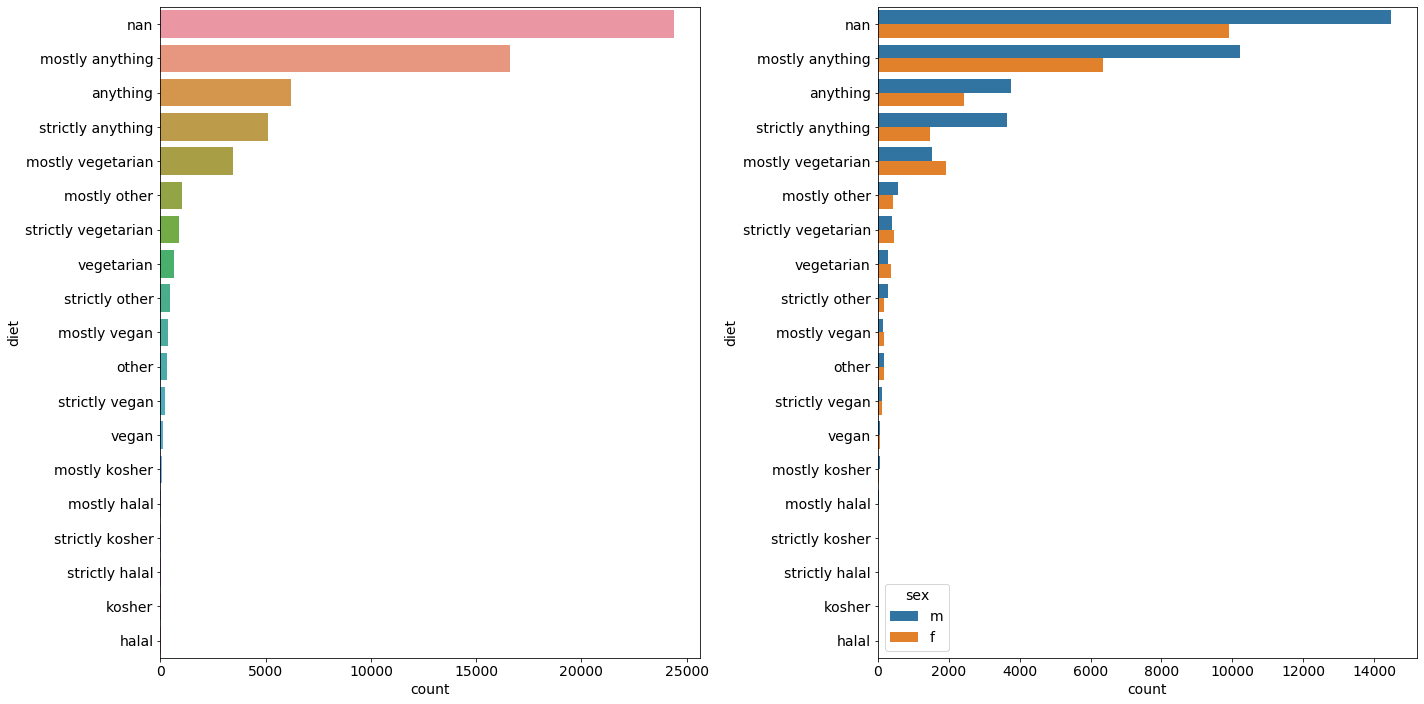

<Figure size 432x288 with 0 Axes>

In [113]:
countplot(cat_df, cat_df.columns[1])

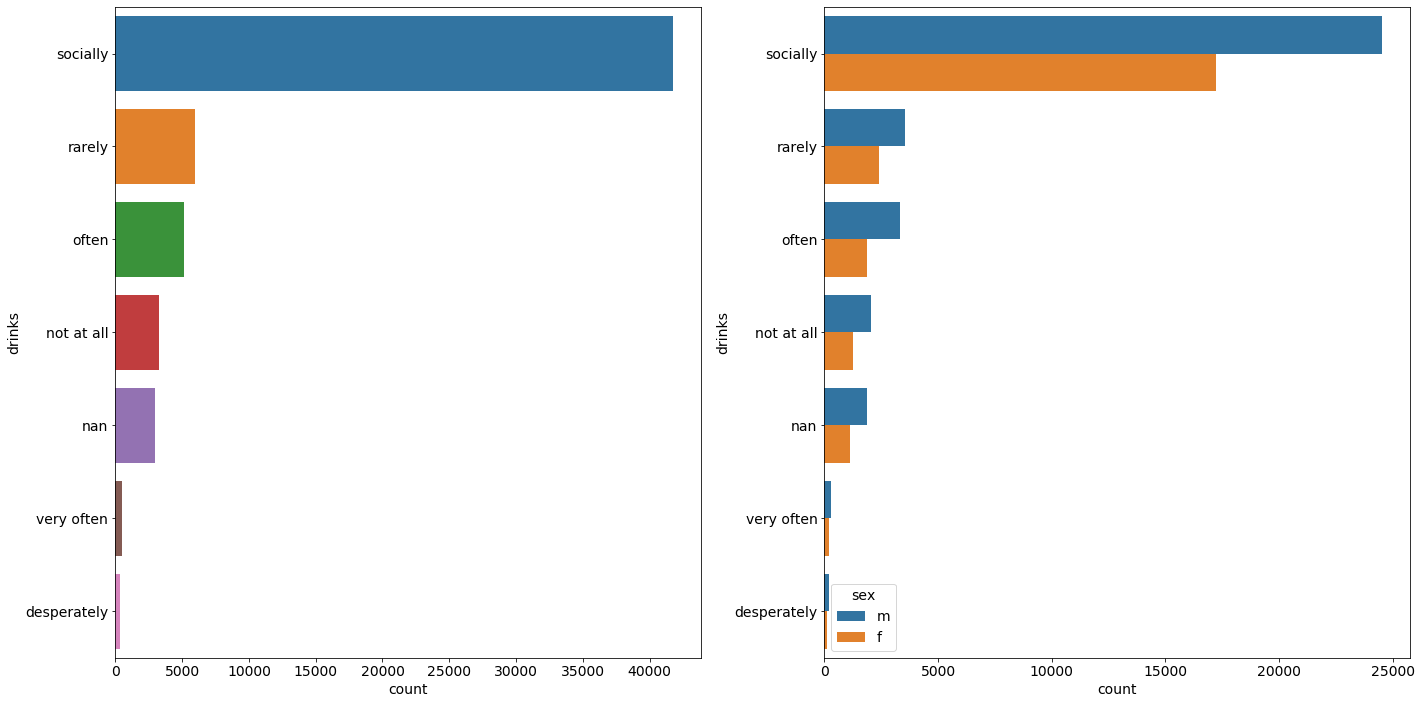

<Figure size 432x288 with 0 Axes>

In [114]:
countplot(cat_df, cat_df.columns[2])

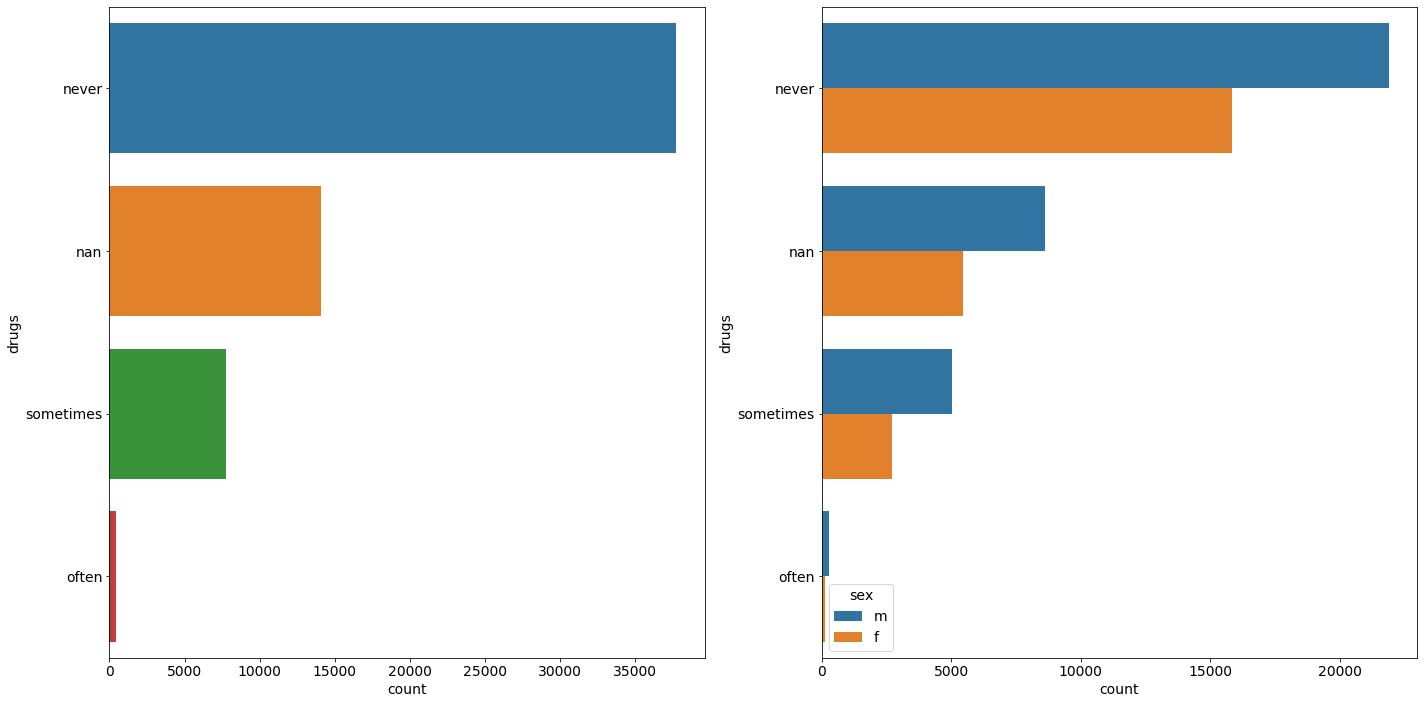

<Figure size 432x288 with 0 Axes>

In [115]:
countplot(cat_df, cat_df.columns[3])

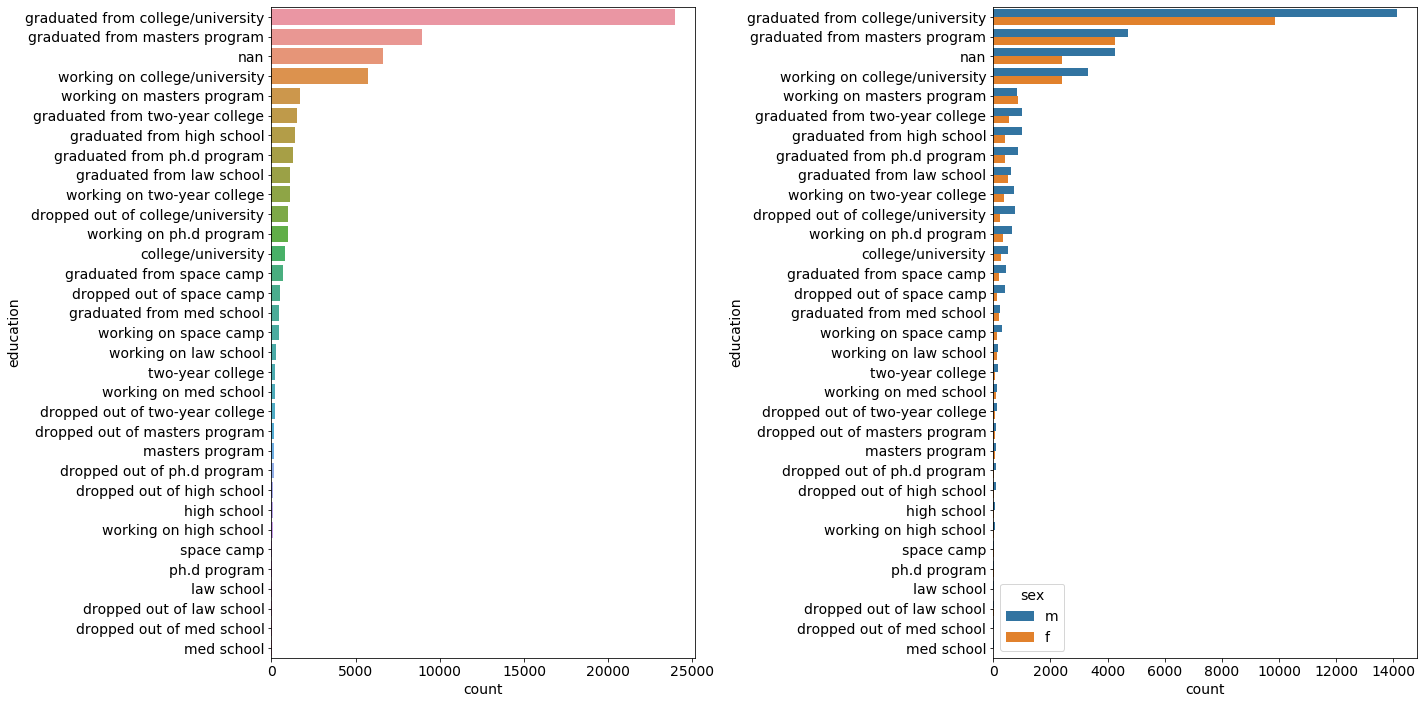

<Figure size 432x288 with 0 Axes>

In [116]:
countplot(cat_df, cat_df.columns[4])

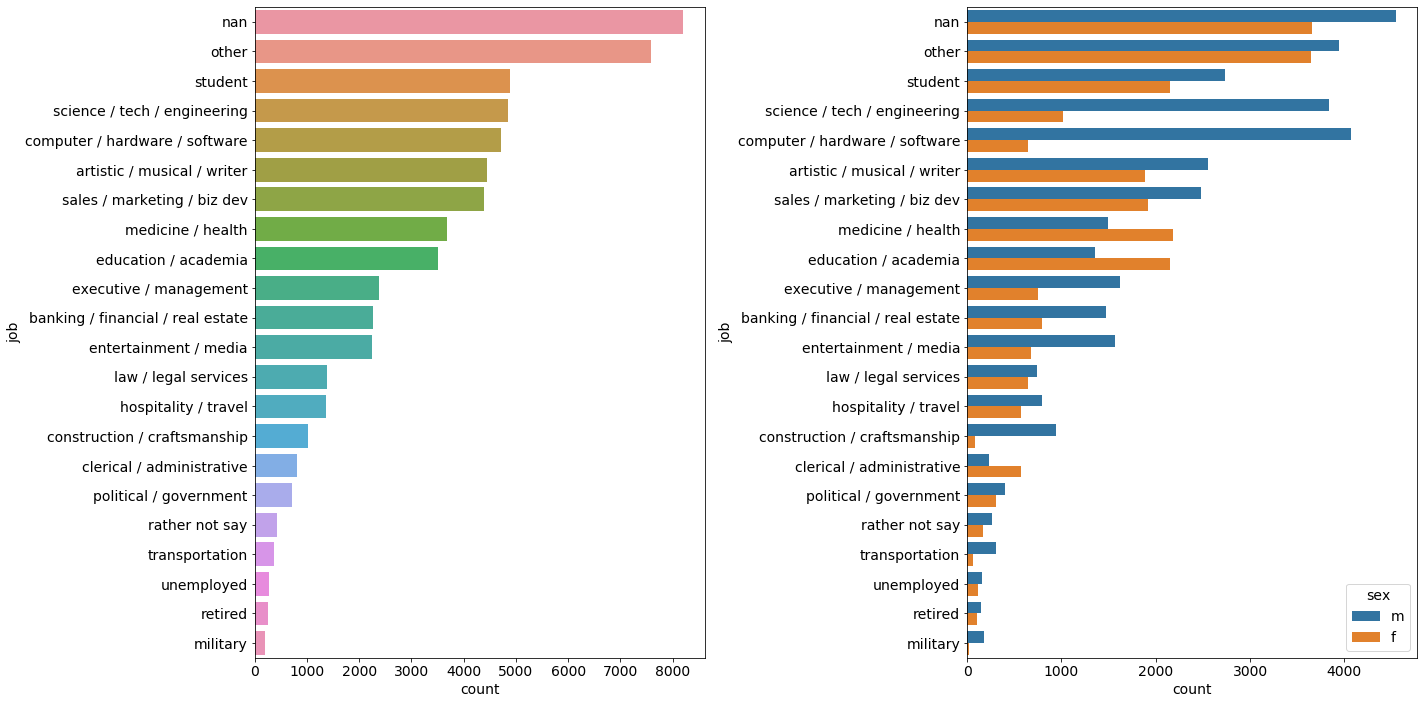

<Figure size 432x288 with 0 Axes>

In [117]:
countplot(cat_df, cat_df.columns[6])

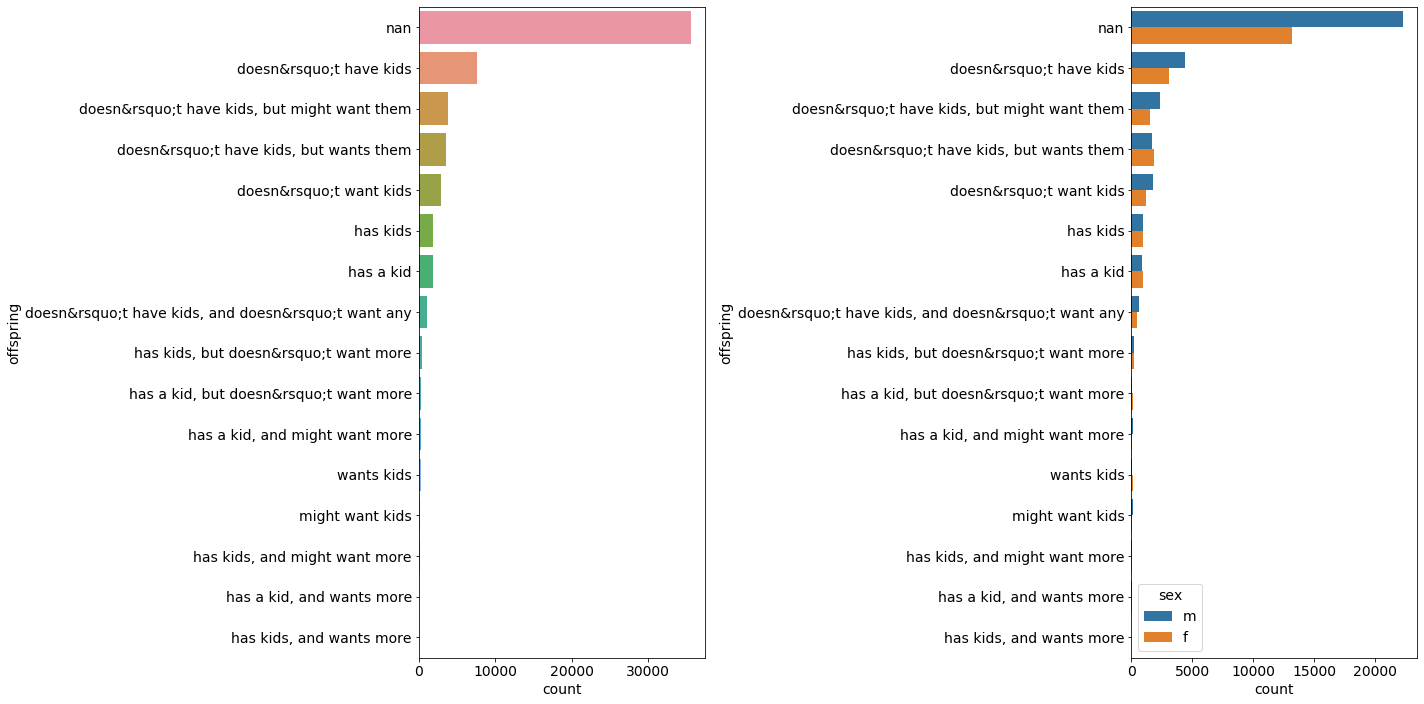

<Figure size 432x288 with 0 Axes>

In [118]:
countplot(cat_df, cat_df.columns[8])

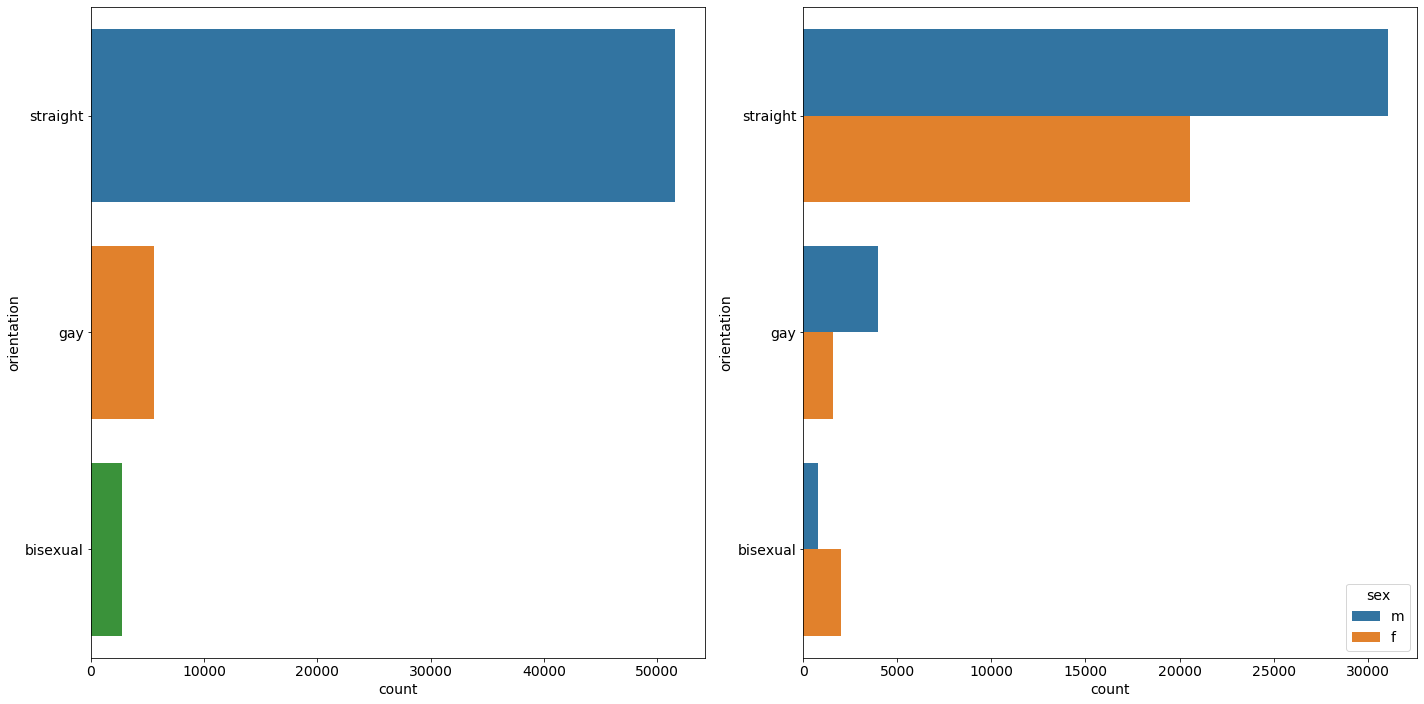

<Figure size 432x288 with 0 Axes>

In [119]:
countplot(cat_df, cat_df.columns[9])

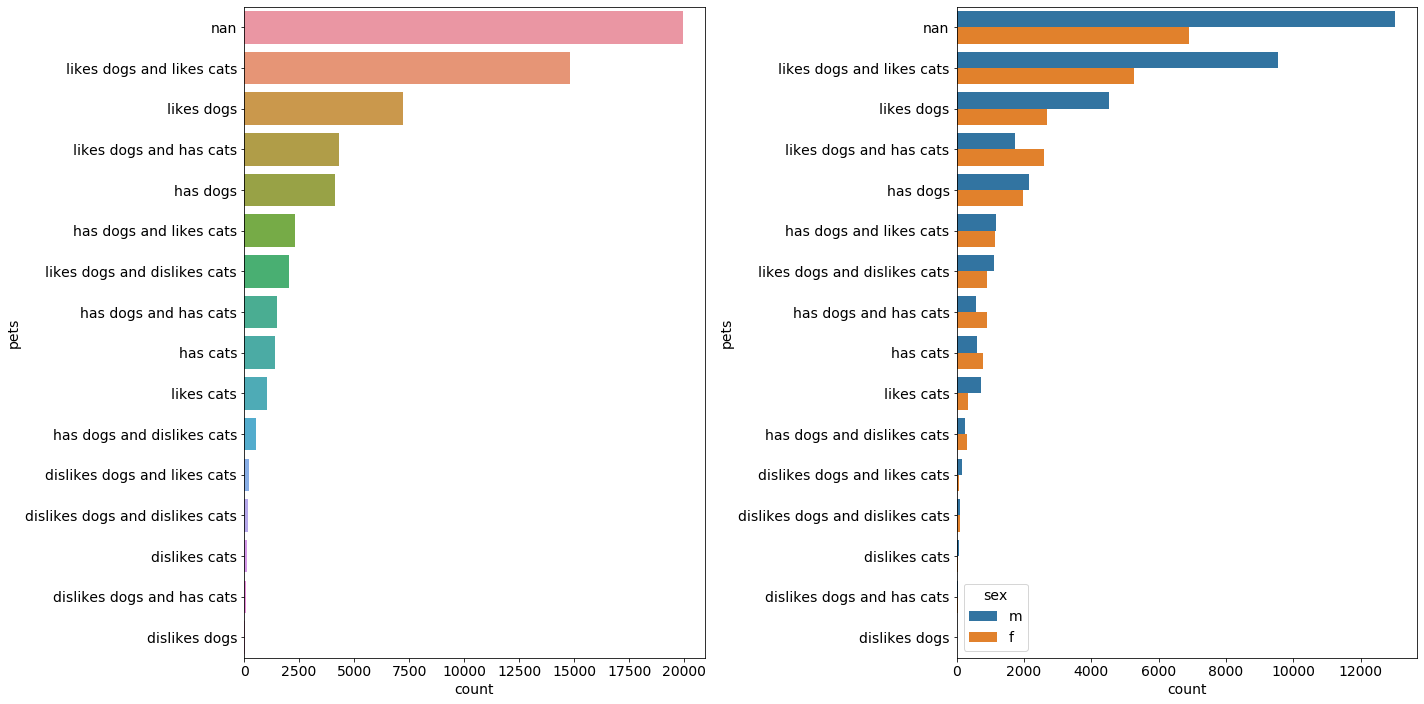

<Figure size 432x288 with 0 Axes>

In [120]:
countplot(cat_df, cat_df.columns[10])

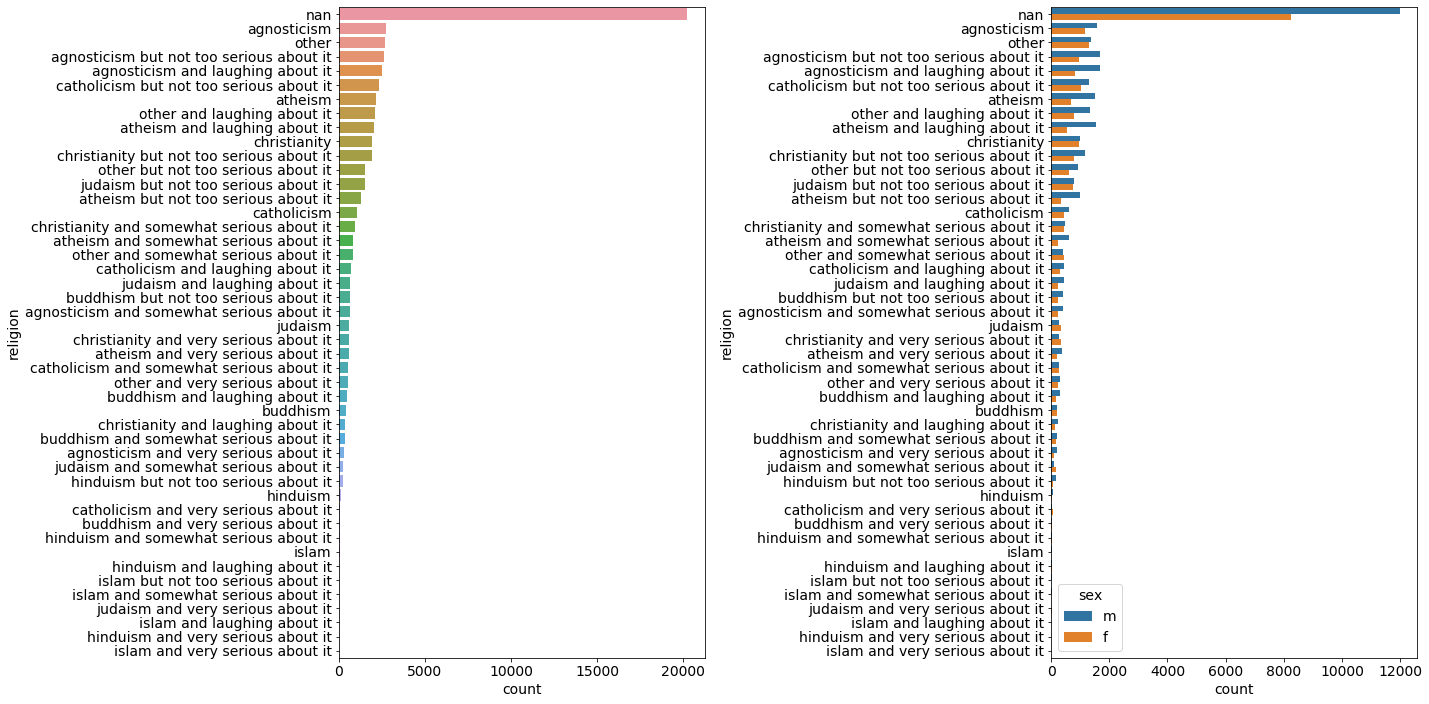

<Figure size 432x288 with 0 Axes>

In [121]:
countplot(cat_df, cat_df.columns[11])

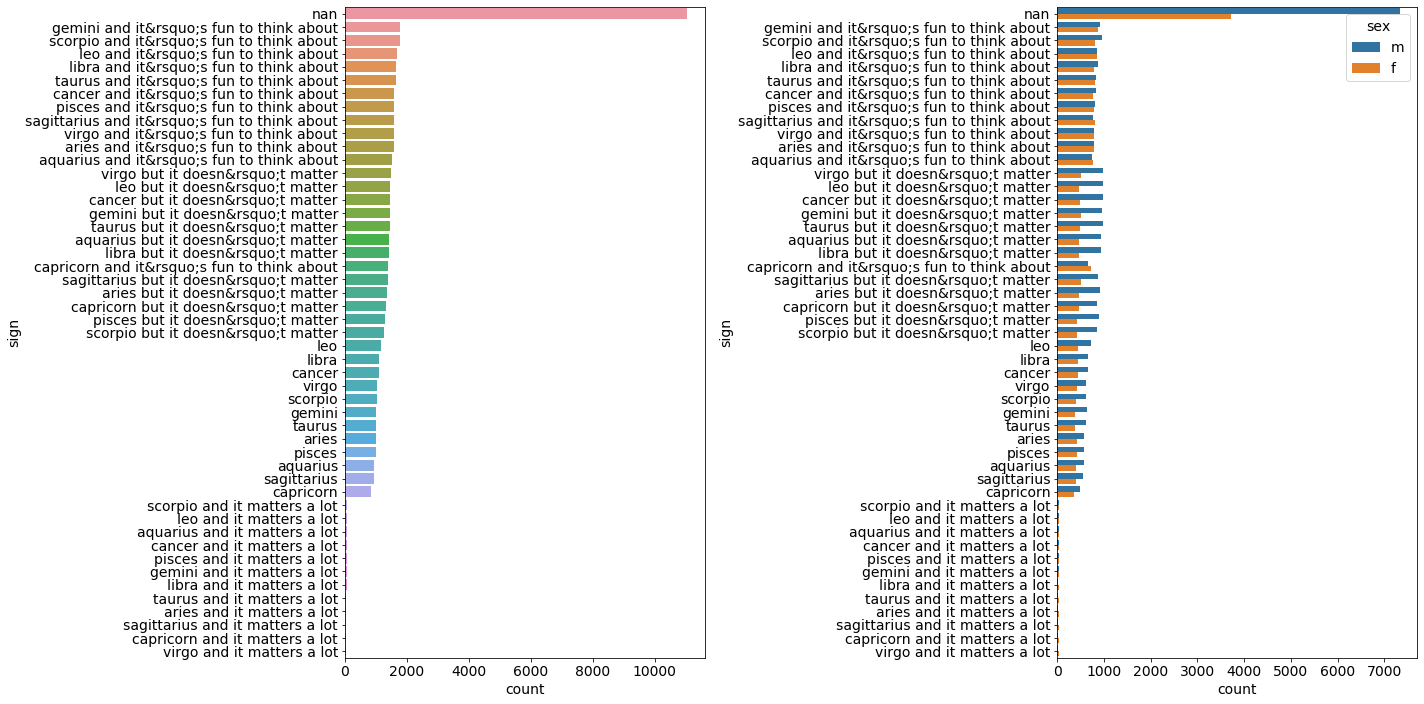

<Figure size 432x288 with 0 Axes>

In [122]:
countplot(cat_df, cat_df.columns[13])

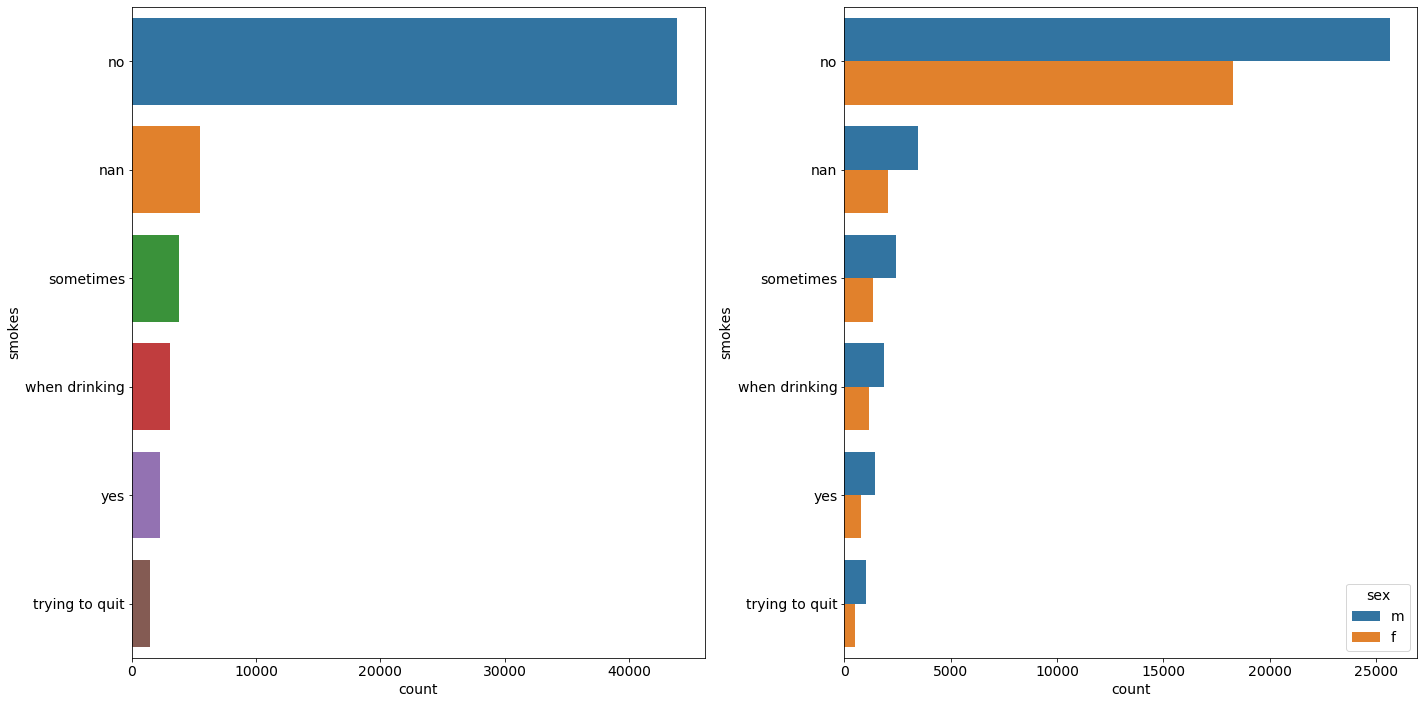

<Figure size 432x288 with 0 Axes>

In [123]:
countplot(cat_df, cat_df.columns[14])

#### From the countplots, we can see some columns need processing. For a start, the religion and sign features can be filtered down further

In [124]:
df['religion'] = df.apply(lambda row: 'not serious' if 'laughing' in row['religion'] else
                            row['religion'].split()[0] if ' ' in row['religion'] else row['religion'], axis=1)

df['religion'].value_counts()

nan             20226
not serious      8995
agnosticism      6316
other            5624
christianity     5414
atheism          4911
catholicism      4032
judaism          2417
buddhism         1482
hinduism          406
islam             123
Name: religion, dtype: int64

In [125]:
df['sign'] = df.apply(lambda row: 'not important' if 'but' in row['sign'] else 
                      row['sign'].split()[0] if " " in row['sign'] else row['sign'], axis=1)

df['sign'].value_counts()

not important    16758
nan              11056
leo               2917
scorpio           2870
gemini            2857
libra             2799
cancer            2752
taurus            2690
pisces            2646
virgo             2644
aries             2616
sagittarius       2567
aquarius          2520
capricorn         2254
Name: sign, dtype: int64

#### Another feature we can reduce segment further is the diet feature. This can be summarised into a smaller number of distinct groups

In [184]:
# diet_dict = {'mostly vegetarian': 'vegetarian',
#              'strictly vegetarian': 'vegetarian',
#              'vegetarian': 'vegetarian'
#              'mostly vegan': 'vegan',
#              'strictly vegan': 'vegan',
#              'vegan': 'vegan',
#              'mostly halal': 
#             'halal': ['mostly halal', 'strictly halal', 'halal'],
#             'kosher': ['mostly kosher', 'strictly kosher', 'kosher'],
#             'anything': ['mostly anything', 'strictly anything', 'anything'],
#             'other': ['mostly other', 'strictly other', 'other']}

df['diet'] = df['diet'].str.replace(r'^.*\s(\w+).*$', r'\1', regex=True)
df['diet']

0          anything
1             other
2          anything
3        vegetarian
4               nan
            ...    
59941           nan
59942      anything
59943      anything
59944      anything
59945           nan
Name: diet, Length: 59946, dtype: object

In [185]:
df.diet.value_counts()

anything      27881
nan           24395
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet, dtype: int64

#### Next, we'll treat group the values in the education feature further

In [210]:
edu_dict = {'graduated from college/university': 'bachelor/college grad',
            'graduated from masters program': 'masters grad',
            'working on college/university': 'bachelor/college student',
            'working on masters program': 'masters student',
            'graduated from two-year college': 'bachelor/college grad',
            'graduated from high school': 'high school grad',
            'graduated from ph.d program': 'phd grad',
            'graduated from law school': 'law grad',
            'working on two-year college': 'bachelor/college student',
            'dropped out of college/university': 'bachelor/college dropout',
            'working on ph.d program': 'phd student',
            'college/university': 'bachelor/college student',
            'graduated from space camp': 'space camp grad',
            'dropped out of space camp': 'space camp dropout',
            'graduated from med school': 'medical grad',
            'working on space camp': 'space camp student',
            'working on law school': 'law student',
            'two-year college': 'bachelor/college grad',
            'working on med school': 'medical student',
            'dropped out of two-year college': 'bachelor/college dropout',
            'dropped out of masters program': 'masters dropout',
            'masters program': 'masters student',
            'dropped out of ph.d program': 'phd dropout',
            'dropped out of high school': 'high school dropout',
            'high school': 'high school grad',
            'working on high school': 'high school student',
            'space camp': 'space camp grad',
            'ph.d program': 'phd grad',
            'law school': 'law grad',
            'dropped out of law school': 'law dropout',
            'dropped out of med school': 'medical dropout',
            'med school': 'medical grad'}

df['education'] = df['education'].map(edu_dict)
df['education'].value_counts()

bachelor/college grad       25712
masters grad                 8961
bachelor/college student     7587
masters student              1819
high school grad             1524
phd grad                     1298
bachelor/college dropout     1186
law grad                     1141
phd student                   983
space camp grad               715
space camp dropout            523
medical grad                  446
space camp student            445
law student                   269
medical student               212
masters dropout               140
phd dropout                   127
high school dropout           102
high school student            87
law dropout                    18
med dropout                    12
med grad                       11
Name: education, dtype: int64

#### Next preprocess the offspring column

In [212]:
df['offspring'].value_counts()

nan                                                    35561
doesn&rsquo;t have kids                                 7560
doesn&rsquo;t have kids, but might want them            3875
doesn&rsquo;t have kids, but wants them                 3565
doesn&rsquo;t want kids                                 2927
has kids                                                1883
has a kid                                               1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any     1132
has kids, but doesn&rsquo;t want more                    442
has a kid, but doesn&rsquo;t want more                   275
has a kid, and might want more                           231
wants kids                                               225
might want kids                                          182
has kids, and might want more                            115
has a kid, and wants more                                 71
has kids, and wants more                                  21
Name: offspring, dtype: 

In [214]:
# First fix the punctuation errors
df['offspring'] = df['offspring'].str.replace('doesn&rsquo;t', 'does not')
df['offspring'].value_counts()

nan                                          35561
does not have kids                            7560
does not have kids, but might want them       3875
does not have kids, but wants them            3565
does not want kids                            2927
has kids                                      1883
has a kid                                     1881
does not have kids, and does not want any     1132
has kids, but does not want more               442
has a kid, but does not want more              275
has a kid, and might want more                 231
wants kids                                     225
might want kids                                182
has kids, and might want more                  115
has a kid, and wants more                       71
has kids, and wants more                        21
Name: offspring, dtype: int64

#### Next we'll look at the location

In [217]:
df.location.value_counts()

san francisco, california              31064
oakland, california                     7214
berkeley, california                    4212
san mateo, california                   1331
palo alto, california                   1064
alameda, california                      910
san rafael, california                   755
hayward, california                      747
emeryville, california                   738
redwood city, california                 693
daly city, california                    681
san leandro, california                  651
walnut creek, california                 644
vallejo, california                      558
menlo park, california                   479
richmond, california                     424
south san francisco, california          416
mountain view, california                384
novato, california                       369
burlingame, california                   361
pleasant hill, california                347
castro valley, california                345
stanford, 

##### Given the large number of locations, this might be better to segment into the broad regions. For instance, people shouldn't be too indifferent about matching with someone else in California one suburb over. Also there are very few overseas persons, and in most of these cases they come from the same area (if there is more than one). With more varied data (i.e., people from all over the world, this could improve the ultimate algorithm further)

In [231]:
df['location'] = df['location'].str.extract(r',\s(.*?)(?:,\s|$)')[0].value_counts()

california              59855
new york                   17
illinois                    8
massachusetts               5
texas                       4
oregon                      4
michigan                    4
florida                     3
arizona                     3
utah                        2
washington                  2
united kingdom              2
spain                       2
colorado                    2
hawaii                      2
minnesota                   2
virginia                    2
georgia                     2
ohio                        2
district of columbia        2
pennsylvania                1
mexico                      1
rhode island                1
tennessee                   1
montana                     1
west virginia               1
switzerland                 1
ireland                     1
connecticut                 1
netherlands                 1
mississippi                 1
idaho                       1
wisconsin                   1
new jersey

#### Next we'll make the smoking feature binary - the reason being there are several "types" of smokers from casual (while drinking) to regular to those trying to quit. Smokers will likely be indifferent to being with smokers, while those trying to quit may want to avoid being around smokers.

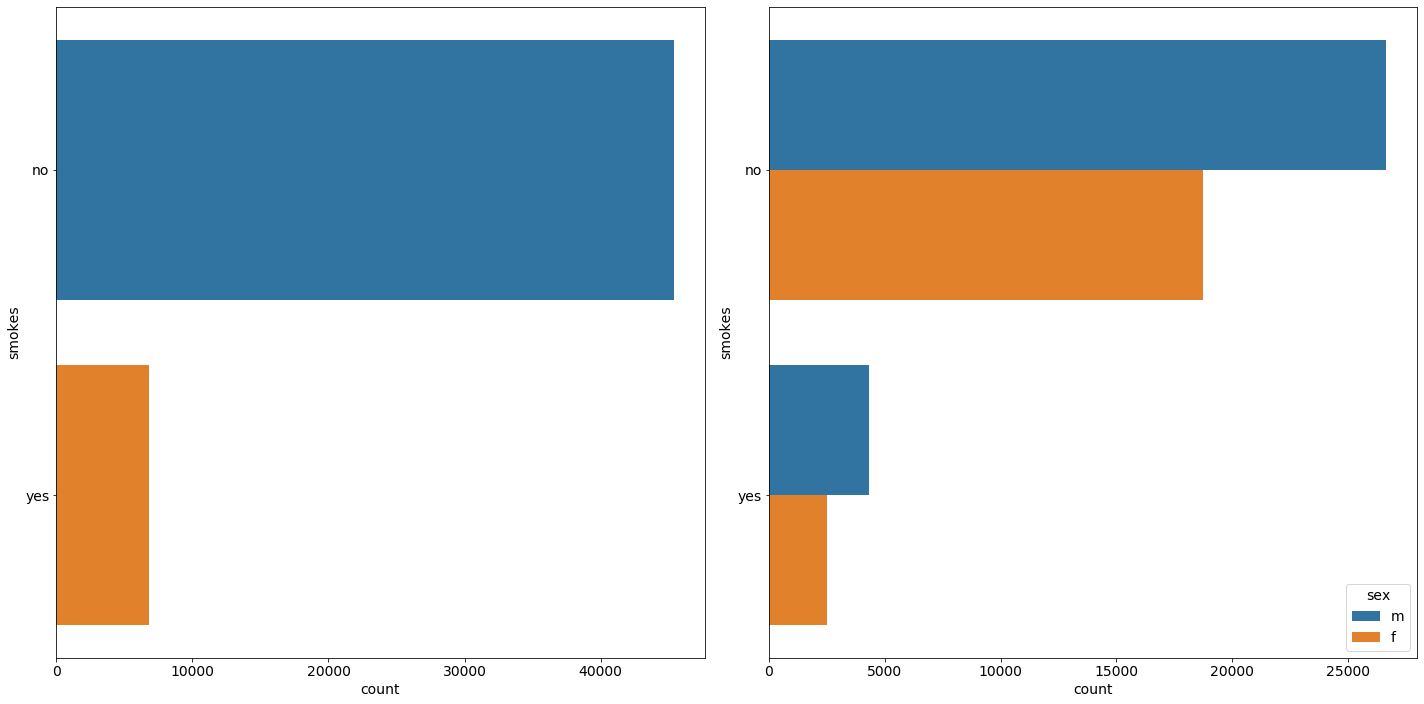

<Figure size 432x288 with 0 Axes>

In [232]:
smoker_dict = {'no': 'no',
              'sometimes': 'yes',
              'when drinking': 'yes',
              'trying to quit': 'no'}

df['smokes'] = df['smokes'].map(smoker_dict)

countplot(df, 'smokes')

#### Ethnicity and language (speaks) were 2 features that could not be plotted, due the the large number of unique values. Let's look at them more closely

In [233]:
df.ethnicity.value_counts()

white                                                                                                      32831
asian                                                                                                       6134
nan                                                                                                         5680
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                    

In [235]:
# First we'll remove all the punctuation from the values
df['ethnicity'] = df['ethnicity'].str.replace(',', '')
df['ethnicity'] = df['ethnicity'].str.replace(' /', '')
df['ethnicity'].value_counts()

white                                                                                            32831
asian                                                                                             6134
nan                                                                                               5680
hispanic latin                                                                                    2823
black                                                                                             2008
other                                                                                             1706
hispanic latin white                                                                              1301
indian                                                                                            1077
asian white                                                                                        811
white other                                                              

##### This is a relatively unvaried feature with a lot of common terms, so we'll use the bag of words model to transform

In [246]:
ethnicity_vect = CountVectorizer()
bow = ethnicity_vect.fit_transform(df['ethnicity'])
print(bow)

  (0, 1)	1
  (0, 13)	1
  (1, 13)	1
  (2, 9)	1
  (3, 13)	1
  (4, 1)	1
  (4, 2)	1
  (4, 11)	1
  (5, 13)	1
  (6, 13)	1
  (6, 11)	1
  (7, 13)	1
  (8, 13)	1
  (9, 13)	1
  (10, 13)	1
  (11, 13)	1
  (12, 13)	1
  (13, 13)	1
  (14, 13)	1
  (14, 4)	1
  (14, 7)	1
  (15, 13)	1
  (16, 13)	1
  (17, 4)	1
  (17, 7)	1
  :	:
  (59928, 7)	1
  (59929, 13)	1
  (59930, 4)	1
  (59930, 7)	1
  (59931, 5)	1
  (59932, 13)	1
  (59933, 13)	1
  (59934, 13)	1
  (59935, 13)	1
  (59936, 1)	1
  (59937, 13)	1
  (59938, 4)	1
  (59938, 7)	1
  (59938, 10)	1
  (59938, 0)	1
  (59939, 13)	1
  (59940, 8)	1
  (59940, 3)	1
  (59941, 9)	1
  (59942, 13)	1
  (59942, 11)	1
  (59943, 1)	1
  (59944, 1)	1
  (59944, 2)	1
  (59945, 13)	1


In [248]:
print(df['ethnicity'].head(200))

0                                            asian white
1                                                  white
2                                                    nan
3                                                  white
4                                      asian black other
5                                                  white
6                                            white other
7                                                  white
8                                                  white
9                                                  white
10                                                 white
11                                                 white
12                                                 white
13                                                 white
14                                  hispanic latin white
15                                                 white
16                                                 white
17                             

In [279]:
ethnicity_df = pd.DataFrame(np.array(bow.todense()), columns=[ethnicity_vect.get_feature_names_out()[i] for i in range(14)])
ethnicity_df.drop(columns=['nan'], inplace=True)

##### In the dataframe above, middle and eastern are likely to have corresponding binary terms, as is the case for pacific and islander and possibly native and american and hispanic and latin. We'll need to check these are exclusively true. 

In [280]:
ethnicity_df[ethnicity_df['middle'] != ethnicity_df['eastern']]

,american,asian,black,eastern,hispanic,indian,islander,latin,middle,native,other,pacific,white


In [281]:
ethnicity_df[ethnicity_df['pacific'] != ethnicity_df['islander']]

,american,asian,black,eastern,hispanic,indian,islander,latin,middle,native,other,pacific,white


In [282]:
ethnicity_df[ethnicity_df['native'] != ethnicity_df['american']]

,american,asian,black,eastern,hispanic,indian,islander,latin,middle,native,other,pacific,white


In [283]:
ethnicity_df[ethnicity_df['hispanic'] != ethnicity_df['latin']]

,american,asian,black,eastern,hispanic,indian,islander,latin,middle,native,other,pacific,white


##### We've confirmed that all of the relevant columns are mutually exclusive, so now we can remove (and rename) relevant columns

In [284]:
ethnicity_df.drop(columns=['eastern', 'islander', 'american', 'latin'], inplace=True)
ethnicity_df.rename(columns={'middle': 'middle_eastern', 'pacific': 'pacific_islander', 'native': 'native_american', \
                             'hispanic': 'hispanic_latin'}, inplace=True)

ethnicity_df

,asian,black,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white
0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
59941,0,0,0,0,0,0,0,0,0
59942,0,0,0,0,0,0,1,0,1
59943,1,0,0,0,0,0,0,0,0
59944,1,1,0,0,0,0,0,0,0


In [286]:
new_df = pd.concat([df, ethnicity_df], axis=1)
new_df.drop(columns=['ethnicity'], inplace=True)
new_df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,status,asian,black,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white
0,22,a little extra,anything,socially,never,bachelor/college student,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,single,1,0,0,0,0,0,0,0,1
1,35,average,other,often,sometimes,space camp student,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,nan,...,single,0,0,0,0,0,0,0,0,1
2,38,thin,anything,socially,nan,masters grad,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,available,0,0,0,0,0,0,0,0,0
3,23,thin,vegetarian,socially,nan,bachelor/college student,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,single,0,0,0,0,0,0,0,0,1
4,29,athletic,nan,socially,never,bachelor/college grad,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,single,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,nan,nan,socially,never,bachelor/college grad,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,single,0,0,0,0,0,0,0,0,0
59942,24,fit,anything,often,sometimes,bachelor/college student,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,single,0,0,0,0,0,0,1,0,1
59943,42,average,anything,not at all,never,masters grad,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,single,1,0,0,0,0,0,0,0,0
59944,27,athletic,anything,socially,often,bachelor/college student,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,single,1,1,0,0,0,0,0,0,0


In [296]:
cat_df.speaks.value_counts().head(50)

english                                                    21828
english (fluently)                                          6628
english (fluently), spanish (poorly)                        2059
english (fluently), spanish (okay)                          1917
english (fluently), spanish (fluently)                      1288
english, spanish                                             859
english (fluently), french (poorly)                          756
english, spanish (okay)                                      655
english, spanish (poorly)                                    609
english (fluently), chinese (fluently)                       535
english (fluently), french (okay)                            532
english (fluently), chinese (okay)                           430
english (poorly)                                             310
english (okay)                                               306
english, chinese                                             306
english (fluently), germa

In [332]:
pattern = r'\s\(okay\)'
cat_df['speaks_new'] = cat_df['speaks'].apply(lambda x: re.sub(pattern, '_moderate', x))
pattern = r'\s\(fluently\)'
cat_df['speaks_new'] = cat_df['speaks_new'].str.replace(pattern, '', regex=True)
pattern = r',\s.+\s\(poorly\)'
cat_df['speaks_new'] = cat_df['speaks_new'].str.replace(pattern, '', regex=True)
cat_df.speaks_new.value_counts()

C:\Users\rahulpraj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rahulpraj\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\rahulpraj\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

english                                                  41772
english, spanish_moderate                                 2770
english, spanish                                          2405
english, chinese                                           909
english, french_moderate                                   793
                                                         ...  
english, hindi, lisp                                         1
english_moderate, spanish, sanskrit, tibetan, yiddish        1
english, german, persian, french_moderate                    1
english, c++, russian                                        1
english, armenian_moderate, russian                          1
Name: speaks_new, Length: 2205, dtype: int64

In [338]:
language_vect = CountVectorizer()
bow = language_vect.fit_transform(cat_df['speaks_new'])
bow_array = np.array(bow.todense())
bow_array.shape

(59946, 152)

In [339]:
language_vect.get_feature_names_out()

array(['_moderate', 'afrikaans', 'afrikaans_moderate', 'albanian',
       'albanian_moderate', 'ancient', 'arabic', 'arabic_moderate',
       'armenian', 'armenian_moderate', 'basque', 'basque_moderate',
       'belarusan', 'belarusan_moderate', 'bengali', 'bengali_moderate',
       'breton', 'breton_moderate', 'bulgarian', 'bulgarian_moderate',
       'catalan', 'catalan_moderate', 'cebuano', 'cebuano_moderate',
       'chechen', 'chechen_moderate', 'chinese', 'chinese_moderate',
       'croatian', 'croatian_moderate', 'czech', 'czech_moderate',
       'danish', 'danish_moderate', 'dutch', 'dutch_moderate', 'english',
       'english_moderate', 'esperanto', 'esperanto_moderate', 'estonian',
       'estonian_moderate', 'farsi', 'farsi_moderate', 'finnish',
       'finnish_moderate', 'french', 'french_moderate', 'frisian',
       'frisian_moderate', 'georgian', 'georgian_moderate', 'german',
       'german_moderate', 'greek', 'greek_moderate', 'gujarati',
       'gujarati_moderate', 'ha